In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [2]:
# creating data for binary classification
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03, random_state=42)

In [4]:
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "Y": y})
circles

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


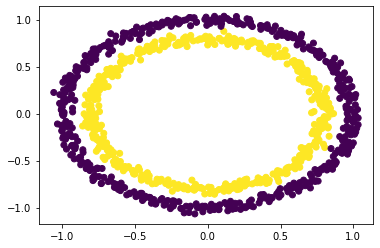

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
tf.random.set_seed(42)
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#make collbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history=model.fit(X_train,
                tf.expand_dims(y_train, axis=-1),
                epochs = 100,
                verbose = 0,
                callbacks = [lr_scheduler])
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 6ms/step - loss: 0.8136 - accuracy: 0.5086


[0.8136078119277954, 0.508571445941925]

Text(0.5, 0, 'epchos')

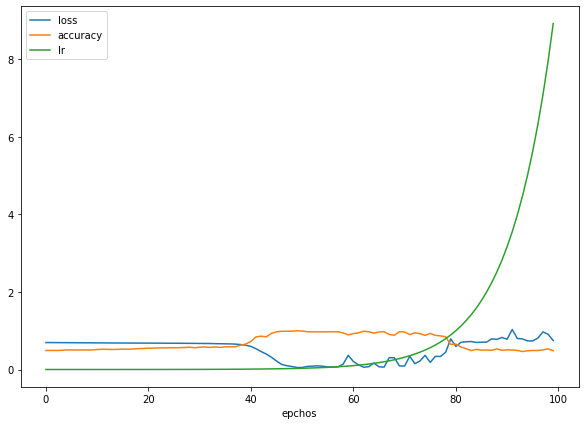

In [77]:
# plot loss curves
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.xlabel("epchos")

Text(0.5, 1.0, 'Learning rate vs loss')

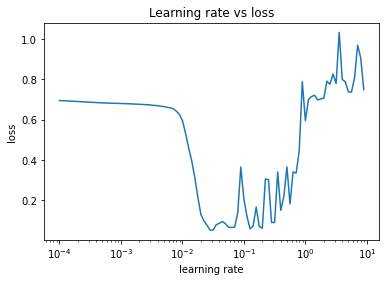

In [82]:
lrs = 1e-4 * 10 ** (np.arange(100)/20)
plt.figure()
plt.semilogx(lrs, history.history["loss"])
plt.ylabel("loss")
plt.xlabel("learning rate")
plt.title("Learning rate vs loss")

In [88]:
tf.random.set_seed(42)
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                metrics = ["accuracy"])

# 3. Fit the model
history=model.fit(X_train,
                tf.expand_dims(y_train, axis=-1),
                epochs = 15,
                verbose = 0)
model.evaluate(X_train, y_train)

/Users/korzeniewski/opt/anaconda3/envs/neural_net/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 5ms/step - loss: 0.0798 - accuracy: 0.9971


[0.07984752207994461, 0.9971428513526917]

In [38]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap=plt.cm.RdYlBu)
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])



10/10 [==============================] - 0s 4ms/step - loss: 0.1116 - accuracy: 0.9800


[0.11163029074668884, 0.9800000190734863]

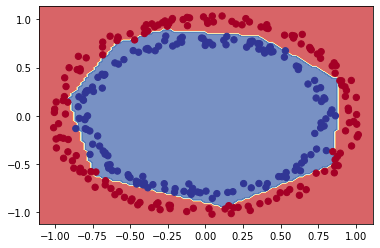

In [89]:
plot_decision_boundary(model, X_test, y_test)
model.evaluate(X_test, y_test)

In [100]:
# another classification evaluation method
print(sk.metrics.f1_score(y_test, (model.predict(X_test) > 0.5).astype("int32")))
print(sk.metrics.accuracy_score(y_test, (model.predict(X_test) > 0.5).astype("int32")))

0.9793103448275863
0.98


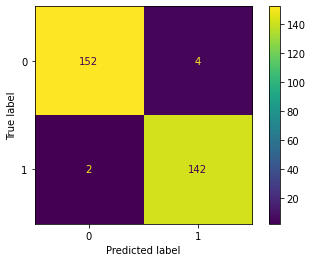

In [104]:
conf = sk.metrics.confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32"))
disp = sk.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()